# **Google reviews(macd) Cleaning and preprocessing**

In [ ]:
#import libraries
import pandas as pd


In [ ]:
#read data
df=pd.read_csv('google.csv')
df.head()

,NBa7we src,d4r55,RfnDt,eaLgGf,hCCjke,rsqaWe,wiI7pd,w8nwRe,dSlJg,dSlJg 2,znYl0,nM6d2c,DZSIDd,wiI7pd 2,znYl0 2
0,https://lh3.googleusercontent.com/a-/ALV-UjXe9...,Rishabh Ambadkar,"Local Guide · 299 reviews · 1,024 photos",,,a month ago,"Nice place, the staff is also helpful and supp...",More,,,Share,Response from the owner,a month ago,"Hi ,\n\nThanks for the appreciation. We always...",NaN
1,https://lh3.googleusercontent.com/a-/ALV-UjUbw...,Aleksander Modrzejewski,Local Guide · 95 reviews · 505 photos,,,a month ago,"Pros: very attentive service, polite and ready...",NaN,,,Share,Response from the owner,a month ago,"Hi ,\n\nThanks for the appreciation. We always...",Like
2,https://lh3.googleusercontent.com/a-/ALV-UjV7j...,Chirag Thakur,Local Guide · 33 reviews · 120 photos,,,3 months ago,"Service was good, although the employees were ...",More,,,Share,NaN,NaN,NaN,Like
3,https://lh3.googleusercontent.com/a-/ALV-UjUcY...,Mansi Mendon,5 reviews · 1 photo,,,a month ago,The Best outlet I have ever been too! Amazing ...,More,,,Share,Response from the owner,a month ago,"Hi ,\n\nThanks for the appreciation. We always...",Like
4,https://lh3.googleusercontent.com/a-/ALV-UjU2O...,ASHUTOSH VERMA,10 reviews · 7 photos,,,2 years ago,Never go this place they did not maintain prop...,More,,,Share,NaN,NaN,NaN,NaN


In [ ]:
df.columns
df.shape

(185, 15)

In [ ]:
#discarding unwanted columns
columns_remove=[0,2,3,4,7,8,9,11,12,13]
df.drop(df.columns[columns_remove],axis=1,inplace=True)

In [ ]:
df.head()

,d4r55,rsqaWe,wiI7pd,znYl0,znYl0 2
0,Rishabh Ambadkar,a month ago,"Nice place, the staff is also helpful and supp...",Share,NaN
1,Aleksander Modrzejewski,a month ago,"Pros: very attentive service, polite and ready...",Share,Like
2,Chirag Thakur,3 months ago,"Service was good, although the employees were ...",Share,Like
3,Mansi Mendon,a month ago,The Best outlet I have ever been too! Amazing ...,Share,Like
4,ASHUTOSH VERMA,2 years ago,Never go this place they did not maintain prop...,Share,NaN


In [ ]:
#rename columns
df.rename(columns={'d4r55':'reviewer_name','rsqaWe':'time','wiI7pd':'review','znYl0':'share','znYl0 2':'like'},inplace=True)
df.head()

,reviewer_name,time,review,share,like
0,Rishabh Ambadkar,a month ago,"Nice place, the staff is also helpful and supp...",Share,NaN
1,Aleksander Modrzejewski,a month ago,"Pros: very attentive service, polite and ready...",Share,Like
2,Chirag Thakur,3 months ago,"Service was good, although the employees were ...",Share,Like
3,Mansi Mendon,a month ago,The Best outlet I have ever been too! Amazing ...,Share,Like
4,ASHUTOSH VERMA,2 years ago,Never go this place they did not maintain prop...,Share,NaN


In [ ]:
df.isnull().sum()

reviewer_name    15
time             15
review           15
share            31
like             36
dtype: int64

In [ ]:
#Handling Missing values
#name
df['reviewer_name'].fillna('noname',inplace=True)
#time
mode_period=df['time'].mode()[0]
df['time'].fillna(mode_period,inplace=True)
#review

df['review'].fillna('no review',inplace=True)
#share
df['share'].fillna('not shared',inplace=True)
#like
df['like'].fillna('dislike',inplace=True)

In [ ]:
df.isnull().sum()

reviewer_name       0
time                0
review              0
share               0
like                0
Cleaned_Review      0
Processed_Review    0
dtype: int64

In [ ]:
#checking duplicates
duplicates=df.duplicated().sum()
duplicates

0

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)
duplicates=df.duplicated().sum()
duplicates

0

In [ ]:
#Preprocessing reviews
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Data Cleaning
#alternate
def clean_text(text):
    return ' '.join([char if char.isalpha() or char.isspace() else ' ' for char in text]).strip()

#alternate 2
def clean_text(text):
    # Remove special characters, numbers, and extra white spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['Cleaned_Review'] = df['review'].apply(clean_text)

# Text Preprocessing
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization and remove stopwords
    return ' '.join(tokens)

df['Processed_Review'] = df['Cleaned_Review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,reviewer_name,time,review,share,like,Cleaned_Review,Processed_Review
0,Rishabh Ambadkar,a month ago,"Nice place, the staff is also helpful and supp...",Share,like,Nice place the staff is also helpful and suppo...,nice place staff also helpful supportive best ...
1,Aleksander Modrzejewski,a month ago,"Pros: very attentive service, polite and ready...",Share,Like,Pros very attentive service polite and ready t...,pro attentive service polite ready help good c...
2,Chirag Thakur,3 months ago,"Service was good, although the employees were ...",Share,Like,Service was good although the employees were m...,service good although employee focused service...
3,Mansi Mendon,a month ago,The Best outlet I have ever been too! Amazing ...,Share,Like,The Best outlet I have ever been too Amazing c...,best outlet ever amazing client servicing
4,ASHUTOSH VERMA,2 years ago,Never go this place they did not maintain prop...,Share,like,Never go this place they did not maintain prop...,never go place maintain proper cleaning please...


In [ ]:
df.to_csv('df.csv')

# **EDA** **and Visualization**

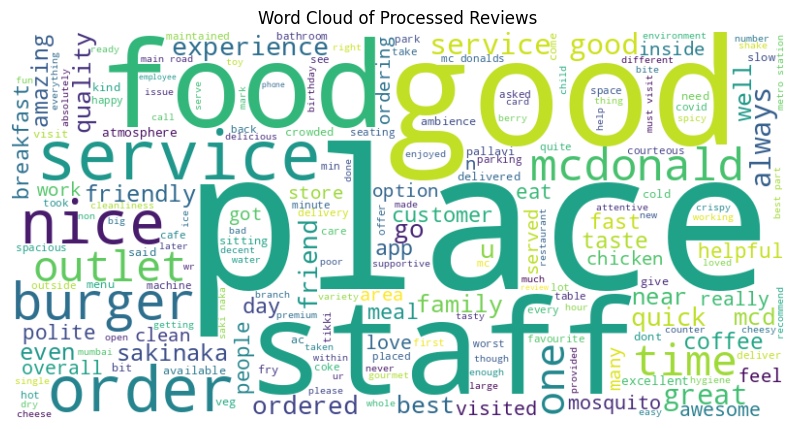

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Word cloud for processed reviews
from wordcloud import WordCloud

processed_reviews = ' '.join(df['Processed_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Reviews')
plt.show()

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
# Apply sentiment analysis using TextBlob
sentiment_scores = df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on polarity scores
df['Sentiment_Score'] = sentiment_scores
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
print(df[['review', 'Processed_Review', 'Sentiment_Score', 'Sentiment']])

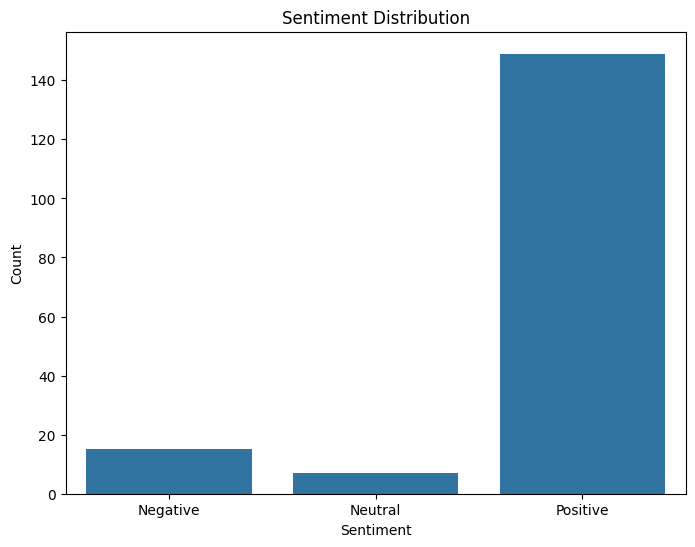

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

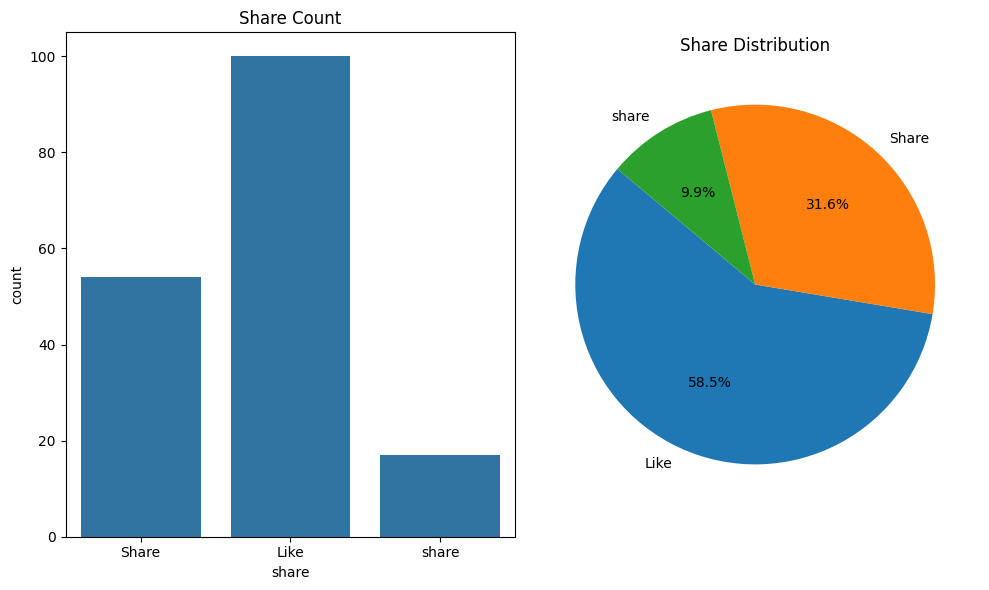

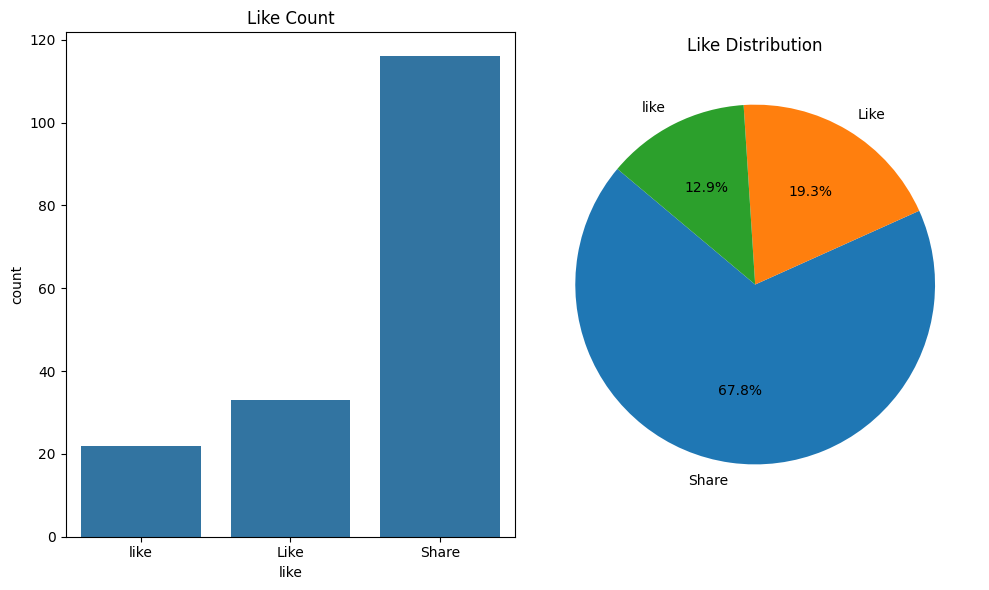

In [ ]:
# Plot count plot for 'share' column
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='share')
plt.title('Share Count')

# Plot pie chart for 'share' column
plt.subplot(1, 2, 2)
share_counts = df['share'].value_counts()
plt.pie(share_counts, labels=share_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Share Distribution')

plt.tight_layout()
plt.show()

# Plot count plot for 'like' column
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='like')
plt.title('Like Count')

# Plot pie chart for 'like' column
plt.subplot(1, 2, 2)
like_counts = df['like'].value_counts()
plt.pie(like_counts, labels=like_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Like Distribution')

plt.tight_layout()
plt.show()